<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Basic-idea" data-toc-modified-id="Basic-idea-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Basic idea</a></span></li><li><span><a href="#ID3-Algorthim" data-toc-modified-id="ID3-Algorthim-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>ID3 Algorthim</a></span></li></ul></li></ul></div>

**Resources：**

[Introductory Applied Machine Learning - Decision Tree](https://www.youtube.com/watch?v=eKD5gxPPeY0&t=62s)

[深入浅出理解决策树算法](https://zhuanlan.zhihu.com/p/26760551)

[Information entropy](https://www.youtube.com/watch?v=2s3aJfRr9gE)

[通俗理解条件熵](https://zhuanlan.zhihu.com/p/26551798)

《机器学习实战》第三章

# Introduction

## Basic idea

Basic idea（divide & conquer）: 
- Use attributes to split data into subsets. Which means divided your dataset based on different type of values within each attribute.
- find out if there is a pure subset. Our target is always the same in a subset. 
- For pure subset, we do not need to split it any further; otherwise, we need to split further (according to some other arrtibute) to get a pure subset.

Therefore, the basic idea is, split our dataset into several pure subsets based on some attribute values.

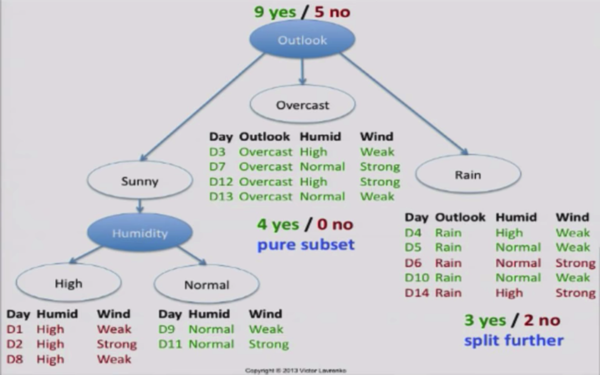

Then turn it into a decision tree, with only result and counts(show confidence).

*counts haven't shown in this figure. It just count the different output at each node.*

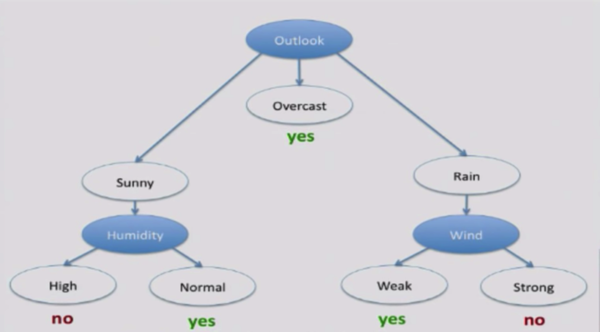

决策树的关键步骤是`分裂属性`。所谓分裂属性就是在某个节点处按照某一特征属性的不同划分构造不同的分支，其目标是让各个分裂子集尽可能地“纯”。尽可能“纯”就是尽量让一个分裂子集中待分类项属于同一类别。

决策树学习的关键其实就是选择最优划分属性，希望划分后，分支结点的`纯度`越来越高。那么`纯度`的度量方法不同，也就导致了学习算法的不同。

## ID3 Algorthim

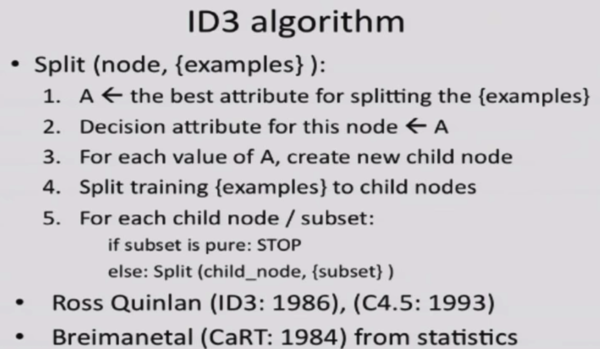

`信息熵`是度量样本集合不确定度（纯度）的最常用的指标。在ID3算法中，采取`信息增益`这个量来作为纯度的度量。首先，`信息熵`是代表随机变量的复杂度（不确定度），`条件熵`代表在某一个条件下，随机变量的复杂度（不确定度）。`信息增益`恰好是：`信息熵`-`条件熵`。

公式和公式的推导可以参考Resources里面的文章。

在《机器学习实战》一书中，采用的就是ID3算法。

In [1]:
# 计算信息熵
from math import log

In [2]:
"""
函数说明

Describe：
对于给定的一个数据集（默认最后一列是label），根据label的类别计算香农熵

Input
dataSet：数据集

Output
shannonEnt：熵值
"""

def calcShannonEnt(dataSet):
    # 数据集中的行数/实例总数
    numEntires = len(dataSet)
    # 保存每个标签（Label）出现次数的“字典”，key为不同的label，value则是这个label下的计数
    labelCounts = {}
    # 对每组特征向量进行统计
    for featVec in dataSet:
        # 提取标签（Label）信息，默认最后一个数是label，作为字典的key
        currentLabel = featVec[-1]
        # 如果标签（Label）没有放入统计次数的字典，添加进去
        if currentLabel not in labelCounts.keys():
            # 创建一个新的键值对，键为currentLabel值为0
            labelCounts[currentLabel] = 0
        # Label计数
        labelCounts[currentLabel] += 1
    # 经验熵（香农熵）
    shannonEnt = 0.0
    # 计算香农熵
    for key in labelCounts:
        # 选择该标签（Label）的概率
        prob = float(labelCounts[key]) / numEntires
        # 利用公式计算
        shannonEnt -= prob*log(prob, 2)
    # 返回香农熵
    return shannonEnt

关于feature的解释：

年龄：0代表青年，1代表中年，2代表老年

有工作：0代表否，1代表是

有自己的房子：0代表否，1代表是

信贷情况：0代表一般，1代表好，2代表非常好

类别（是否给贷款）：no代表否，yes代表是

In [3]:
def createDataSet():
    # 定一个一个数据集
    dataSet = [[0, 0, 0, 0, 'no'],
               [0, 0, 0, 1, 'no'],
               [0, 1, 0, 1, 'yes'],
               [0, 1, 1, 0, 'yes'],
               [0, 0, 0, 0, 'no'],
               [1, 0, 0, 0, 'no'],
               [1, 0, 0, 1, 'no'],
               [1, 1, 1, 1, 'yes'],
               [1, 0, 1, 2, 'yes'],
               [1, 0, 1, 2, 'yes'],
               [2, 0, 1, 2, 'yes'],
               [2, 0, 1, 1, 'yes'],
               [2, 1, 0, 1, 'yes'],
               [2, 1, 0, 2, 'yes'],
               [2, 0, 0, 0, 'no']]
    # 分类属性
    labels = ['年龄', '有工作', '有自己的房子', '信贷情况']
    # 返回数据集和分类属性
    return dataSet, labels

In [4]:
data, label = createDataSet()

In [6]:
label

['年龄', '有工作', '有自己的房子', '信贷情况']

In [7]:
data

[[0, 0, 0, 0, 'no'],
 [0, 0, 0, 1, 'no'],
 [0, 1, 0, 1, 'yes'],
 [0, 1, 1, 0, 'yes'],
 [0, 0, 0, 0, 'no'],
 [1, 0, 0, 0, 'no'],
 [1, 0, 0, 1, 'no'],
 [1, 1, 1, 1, 'yes'],
 [1, 0, 1, 2, 'yes'],
 [1, 0, 1, 2, 'yes'],
 [2, 0, 1, 2, 'yes'],
 [2, 0, 1, 1, 'yes'],
 [2, 1, 0, 1, 'yes'],
 [2, 1, 0, 2, 'yes'],
 [2, 0, 0, 0, 'no']]

In [10]:
calcShannonEnt(data)
# 这里可以看到，熵非常高，说明混合的数据很多。

0.9709505944546686

接下来，我们需要按照获取最大信息增益的方法划分数据集

In [5]:
"""
函数说明

Describe：
对于给定的一个数据集，按照某个feature特定类别进行划分

Input
dataSet：数据集
feature：所选择feature的index
value：选择的feature的某个类别

Output
retDataSet：按照某个feature特定类别划分的数据集
"""

# 首先，是一个根据制定特征划分数据集的函数
def splitDataSet(dataSet, feature, value):
    # 创建返回的数据集列表
    retDataSet = []
    # 遍历数据集的每一行
    for featVec in dataSet:
        # 对于每一行中，制定某个feature，判断是否等于某一类别
        if featVec[feature] == value:
            # 这里通过两次切片使得新的列表不包含我们选择的feature
            reducedFeatVec = featVec[:feature]
            reducedFeatVec.extend(featVec[feature+1:])
            # 把一行添加到要返回的数据集中
            retDataSet.append(reducedFeatVec) 
    # 返回划分后的数据集
    return retDataSet

注意，这里我有考虑修改为pop(feature)，这样就能直接剔除掉我们所选择的feature列，但是pop和切片不同，pop会影响原数据，这是我们不希望看到的。

In [6]:
splitDataSet(data, 1, 0)

[[0, 0, 0, 'no'],
 [0, 0, 1, 'no'],
 [0, 0, 0, 'no'],
 [1, 0, 0, 'no'],
 [1, 0, 1, 'no'],
 [1, 1, 2, 'yes'],
 [1, 1, 2, 'yes'],
 [2, 1, 2, 'yes'],
 [2, 1, 1, 'yes'],
 [2, 0, 0, 'no']]

splitDataSet将原始的dataset按照制定feature的指定类别进行划分。比如，这里我们选择没有工作（data[1] = 0）这一类别，相当于我们在一个判断是否有工作的节点中，得到的全部没有工作的子节点。这时候我们就可以去掉这个feature对应的这一列。因此划分后的数据集已经全部是没有工作的人了，我们只需判断在这种情况下数据集的信息增益。

chooseBestFeatureToSplit()函数用来选取特征，划分数据集。

In [7]:
"""
函数说明

Describe：
选取特征划分数据集，计算出最好的划分数据集的特征

Input
dataSet：数据集（最后一列为label）

Output
bestFeature：信息增益最大的特征的索引值
"""

def chooseBestFeatureToSplit(dataSet):
    # 判断有多少特征属性（剔除了label列）
    numFeatures = len(dataSet[0]) - 1
    # 计算数据集的无序度量值，便于后面进行比较
    baseEntropy = calcShannonEnt(dataSet)
    # 初始化信息增益
    bestInfoGain = 0.0
    # 初始化最优特征的索引值
    bestFeature = -1
    # 遍历所有特征
    for i in range(numFeatures):
        # 获取dataSet的第i个所有特征存在featList
        featList = [row[i] for row in dataSet]
        # 剔除重复的元素
        uniqueVals = set(featList)
        # 经验条件熵
        newEntropy = 0.0
        # 计算信息增益
        for value in uniqueVals:
            # subDataSet划分后的子集
            subDataSet = splitDataSet(dataSet, i, value)
            # 计算每个feature类别的概率
            prob = len(subDataSet) / float(len(dataSet))
            # 根据公式计算经验条件熵
            newEntropy += prob * calcShannonEnt(subDataSet)
        # 信息增益
        infoGain = baseEntropy - newEntropy
        # 打印每个特征的信息增益
        print("第%d个特征的信息增益为%.3f" % (i, infoGain))
        # 计算信息增益
        if(infoGain > bestInfoGain):
            # 更新信息增益，找到最大的信息增益
            bestInfoGain = infoGain
            # 记录信息增益最大的特征的索引值
            bestFeature = i
    # 返回信息增益最大的特征的索引值
    return bestFeature

比如，当i为1时，featList储存了dataset中feature i所存储的全部类别，uniqueVals剔除了其中重复的取值。按照uniqueVals中每一个可能的value（也就是feature类别）划分数据集。并计算条件熵。

In [15]:
chooseBestFeatureToSplit(data)

第0个特征的信息增益为0.083
第1个特征的信息增益为0.324
第2个特征的信息增益为0.420
第3个特征的信息增益为0.363


2

当然，目前我们只进行了一次划分来选择最优的feature，按照前面所提到的，我们要不断递归直到所有的结果都是pure subset。

In [8]:
import operator

In [9]:
"""
函数说明

Describe
当算法使用了所有属性依然有非pure的节点，用多数表决的方法决定改叶子节点的属性

Input
classList

Output
sortedClassCount[0][0]:
"""

def majorityCnt(classList):
    classCount = {}
    # 统计classList中每个元素出现的次数
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    # 根据字典的值降序排序
    # operator.itemgetter(1)获取对象的第1列的值
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
    # 返回classList中出现次数最多的元素
    return sortedClassCount[0][0]

In [17]:
# 展开以便于理解,这个list中有三个“yes”和一个“No”
list1 = [row[-1] for row in data][:5]
list1

['no', 'no', 'yes', 'yes', 'no']

In [18]:
# 简单的计数
classCount = {}
for vote in list1:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1

In [19]:
classCount

{'no': 3, 'yes': 2}

In [22]:
sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)

[('no', 3), ('yes', 2)]

[sorted( )和operator.itemgetter( )用法](https://docs.python.org/zh-cn/3/howto/sorting.html)

接下来我们来创建树:

In [10]:
"""
函数说明

Describe
ID3算法

Input
dataSet：dataset（最后一列为target列）
labels：标签列表，数据中target特征的标签，目的是给出数据明确的含义
featLabels：

Output
sortedClassCount[0][0]:
"""

def createTree(dataSet, labels):
    # 取分类标签（是否放贷：yes or no）
    classList = [row[-1] for row in dataSet]
    # 递归第一个停止条件：如果类别完全相同则停止继续划分
    # classList[0]在这里就是在这个list取得第一个值，比如0，如果全是0就返回0
    if classList.count(classList[0]) == len(classList):
        # 返回类别
        return classList[0]
    # 递归第二个停止条件：使用完了所有特征，dataSet[0]等于1的时候，说明这个数据只有1个特征
    # 遍历完所有特征时返回出现次数最多的类标签
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    # 当前数据选取的最好特征
    bestFeat = chooseBestFeatureToSplit(dataSet)
    # 最优特征的标签
    bestFeatLabel = labels[bestFeat]
    # 根据最优特征的标签生成树
    # key就是我们所提取的最优特征标签，比如”有没有工作“，value又是一个嵌入的字典
    myTree = {bestFeatLabel:{}}
    # 删除已经使用的特征标签
    del(labels[bestFeat])
    # 得到训练集中所有最优解特征的属性值
    featValues = [row[bestFeat] for row in dataSet]
    # 去掉重复的属性值
    uniqueVals = set(featValues)
    # 遍历特征，创建决策树
    for value in uniqueVals:
        subLables = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLables)
    return myTree

In [12]:
# 这一部分递归是关键部分，我们不妨让程序自己告诉我们它都做了什么？

def createTreeEx(dataSet, labels):
    print("————————————分割线——————————————")
    classList = [row[-1] for row in dataSet]
    if classList.count(classList[0]) == len(classList):
        print(f"触发终止条件1: target feature已经全部为{classList[0]}")
        return classList[0]
    if len(dataSet[0]) == 1:
        print(f"触发终止条件2: dataset已经不能继续划分了")
        print(f"多数表决结果为: {majorityCnt(classList)}")
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    print(f"选择的最优划分feature：{bestFeatLabel}")
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [row[bestFeat] for row in dataSet]
    uniqueVals = set(featValues)
    print(f"当前feature全部类别包括：{uniqueVals}")
    for value in uniqueVals:
        print(f"当前划分数据集所选类别：{value}")
        subLables = labels[:]
        print(f"当前所剩feature：{subLables}")
        myTree[bestFeatLabel][value] = createTreeEx(splitDataSet(dataSet, bestFeat, value), subLables)
        print(f"当前tree：{myTree}")
    return myTree

In [13]:
data, label = createDataSet()
createTreeEx(data, label)

————————————分割线——————————————
第0个特征的信息增益为0.083
第1个特征的信息增益为0.324
第2个特征的信息增益为0.420
第3个特征的信息增益为0.363
选择的最优划分feature：有自己的房子
当前feature全部类别包括：{0, 1}
当前划分数据集所选类别：0
当前所剩feature：['年龄', '有工作', '信贷情况']
————————————分割线——————————————
第0个特征的信息增益为0.252
第1个特征的信息增益为0.918
第2个特征的信息增益为0.474
选择的最优划分feature：有工作
当前feature全部类别包括：{0, 1}
当前划分数据集所选类别：0
当前所剩feature：['年龄', '信贷情况']
————————————分割线——————————————
触发终止条件1: target feature已经全部为no
当前tree：{'有工作': {0: 'no'}}
当前划分数据集所选类别：1
当前所剩feature：['年龄', '信贷情况']
————————————分割线——————————————
触发终止条件1: target feature已经全部为yes
当前tree：{'有工作': {0: 'no', 1: 'yes'}}
当前tree：{'有自己的房子': {0: {'有工作': {0: 'no', 1: 'yes'}}}}
当前划分数据集所选类别：1
当前所剩feature：['年龄', '有工作', '信贷情况']
————————————分割线——————————————
触发终止条件1: target feature已经全部为yes
当前tree：{'有自己的房子': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}}


{'有自己的房子': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}}

In [23]:
# Visualize our tree 

In [14]:
from sklearn.tree import DecisionTreeClassifier
data, label = createDataSet()

In [15]:
dtree = DecisionTreeClassifier()

In [16]:
import numpy as np
dataArray = np.array([row[:-1] for row in data]).astype(int)

In [17]:
targetArray = np.array([row[-1] for row in data]).astype(str)

In [18]:
targetArray

array(['no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'no'], dtype='<U3')

In [19]:
dtree.fit(dataArray,targetArray)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
label

['年龄', '有工作', '有自己的房子', '信贷情况']

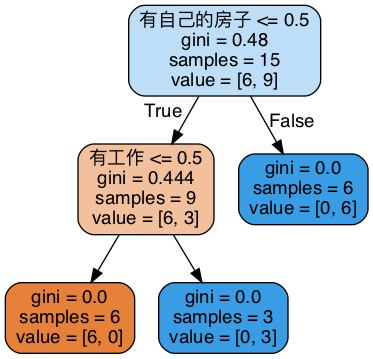

In [22]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
# install graphviz using conda instead of pip

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=label,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  